
Test SVM with custom Gaussian kernels

Author: Eric Eaton, 2014

Adapted from scikit_learn documentation.


Training the SVMs...

Testing the SVMs...


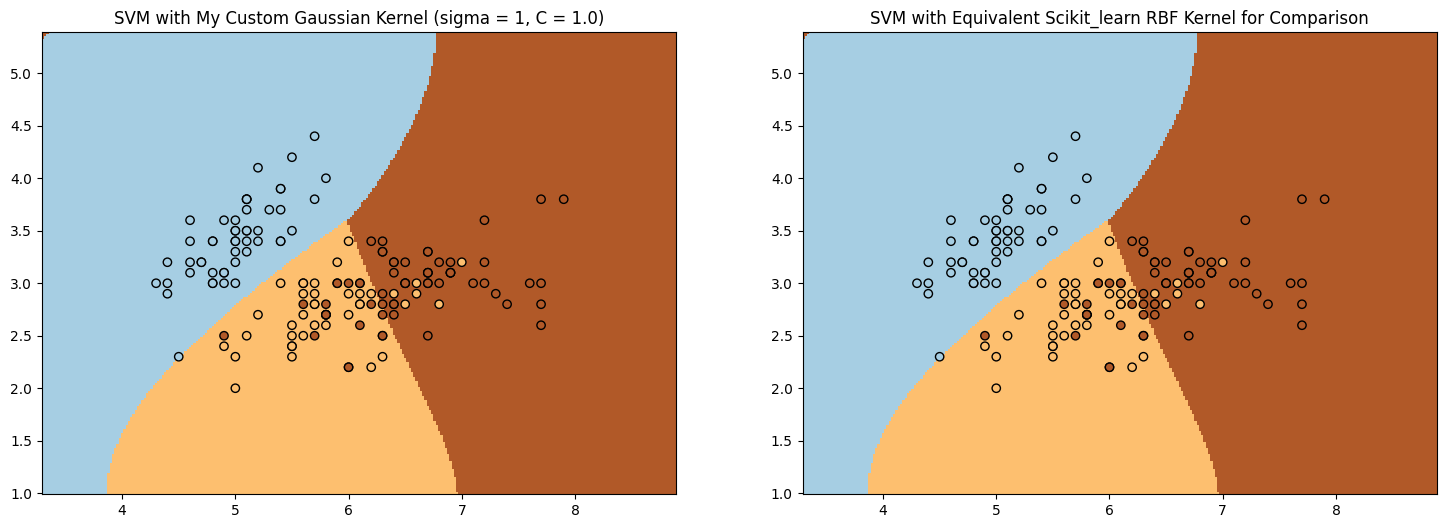

In [1]:
"""
=====================================
Test SVM with custom Gaussian kernels
=====================================

Author: Eric Eaton, 2014

Adapted from scikit_learn documentation.

"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from svmKernels import myGaussianKernel
from svmKernels import _gaussSigma

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features
Y = iris.target

print("Training the SVMs...")

C = 1.0  # value of C for the SVMs

# create an instance of SVM with the custom kernel and train it
myModel = svm.SVC(C=C, kernel=myGaussianKernel)
myModel.fit(X, Y)

# create an instance of SVM with build in RBF kernel and train it
equivalentGamma = 1.0 / (2 * _gaussSigma ** 2)
model = svm.SVC(C=C, kernel='rbf', gamma=equivalentGamma)
model.fit(X, Y)

print("")
print("Testing the SVMs...")

h = .02  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


# get predictions for both my model and true model
myPredictions = myModel.predict(np.c_[xx.ravel(), yy.ravel()])
myPredictions = myPredictions.reshape(xx.shape)

predictions = model.predict(np.c_[xx.ravel(), yy.ravel()])
predictions = predictions.reshape(xx.shape)

# plot my results
plt.figure(figsize=(18, 6), dpi=100)

plt.subplot(1, 2, 1)
plt.pcolormesh(xx, yy, myPredictions, cmap="Paired")
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="Paired", edgecolors="black")  # Plot the training points
plt.title("SVM with My Custom Gaussian Kernel (sigma = "+str(_gaussSigma) + ", C = "+str(C)+")")
plt.axis('tight')

# plot built-in results
plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, predictions, cmap="Paired")
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="Paired", edgecolors="black")  # Plot the training points
plt.title('SVM with Equivalent Scikit_learn RBF Kernel for Comparison')
plt.axis('tight')

plt.show()
